In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score

In [847]:
#Read the whole data
mushroom_data=pd.read_csv("mushrooms.csv")
#display first 5 instances
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [848]:

mushroom_class=mushroom_data["class"].apply(lambda x : 1 if x == "p" else 0)#
mushroom_class

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [849]:
#mushroom_class=mushroom_class.to_numpy()
#type(mushroom_class)

In [850]:
mushroom_features=mushroom_data.iloc[:,1:]

In [851]:
duplicateDFRow = mushroom_features[mushroom_features.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 22 columns]


In [852]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
mushroom_coded=onehot.fit_transform(mushroom_features)
#print(mushroom_coded_value.get_feature_names())
#print(one_hot.get_feature_names())
mushroom_coded=mushroom_coded.toarray()#converting sparse matrix to numpy array

categorical_features=mushroom_data.iloc[:,1:].columns
########Giving proper names to columns after encoding#####
onehot_feat_names=OneHotEncoder(handle_unknown='ignore')
mushroom_fullcoded=onehot_feat_names.fit_transform(mushroom_features)
cat_names=onehot_feat_names.get_feature_names(categorical_features)
cat_names=cat_names.flatten()
mushroom_col=pd.DataFrame.sparse.from_spmatrix(mushroom_fullcoded,columns=cat_names)

In [853]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [854]:
from sklearn.preprocessing import StandardScaler
Std_Scaler = StandardScaler()
mushroom_scaled = Std_Scaler.fit_transform(mushroom_coded)

In [855]:
mushroom_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [856]:
#X_train,X_test,y_train,y_test=train_test_split(mushroom_scaled,mushroom_class,test_size=0.3,random_state=42)

In [857]:
pca_data=PCA(n_components=2).fit_transform(mushroom_scaled)
pca_data

array([[-3.28474622,  1.0201901 ],
       [-3.96948439, -0.85682492],
       [-4.9585916 , -0.21103836],
       ...,
       [-1.87389638,  8.64938997],
       [ 3.63689299,  4.46081073],
       [-1.73109694,  9.46851773]])

# silhouette method

In [858]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(pca_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [859]:
silhouette_scores = [silhouette_score(pca_data, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores

[0.5856842069122511,
 0.7562406901753789,
 0.7862372437984542,
 0.5715345351672485,
 0.5805625025751192,
 0.5802958663624707,
 0.504045160512325,
 0.5241822330628667]

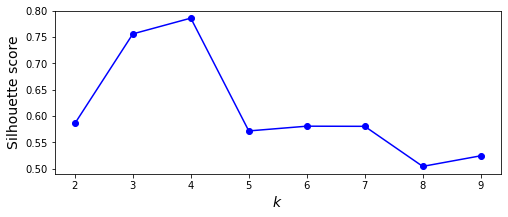

In [860]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

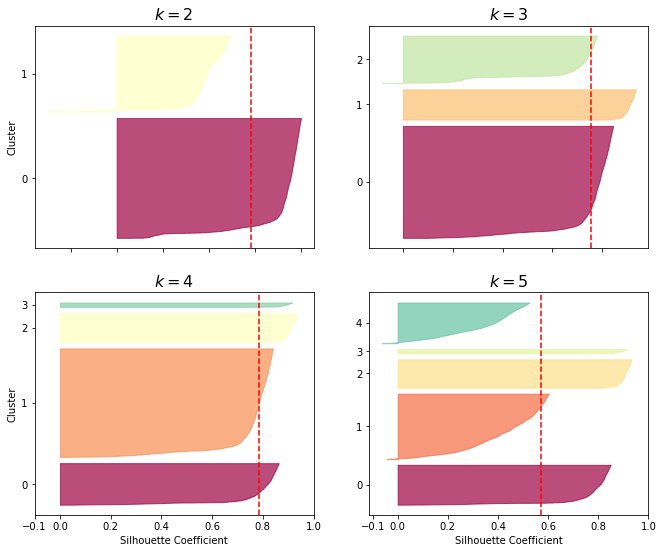

In [861]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_data, y_pred)

    padding = len(pca_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

In [862]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans.fit(pca_data)
kmeans3 = KMeans(init="k-means++", n_clusters=3, n_init=10)
kmeans3.fit(pca_data)
kmeans4 = KMeans(init="k-means++", n_clusters=4, n_init=10)
kmeans4.fit(pca_data)

KMeans(n_clusters=4)

In [863]:
label_pred= kmeans.predict(pca_data)

In [864]:
sh_score = silhouette_score(pca_data, label_pred)

In [865]:
sh_score

0.5856842069122511

In [866]:
rand_score=adjusted_rand_score(mushroom_class, label_pred)

In [867]:
rand_score

0.6139652820988483

In [868]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, pca_data, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
                mins = pca_data.min(axis=0) - 0.1
                maxs = pca_data.max(axis=0) + 0.1
                xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
                
                Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                  cmap="gist_earth")
                plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                  linewidths=1, colors='k')
                plot_data(pca_data)
                if show_centroids:
                       plot_centroids(clusterer.cluster_centers_)
                if show_xlabels:
                             plt.xlabel("$x_1$", fontsize=14)
                else:
                             plt.tick_params(labelbottom=False)
                if show_ylabels:
                             plt.ylabel("$x_2$", fontsize=14, rotation=0)
                else:
                             plt.tick_params(labelleft=False)

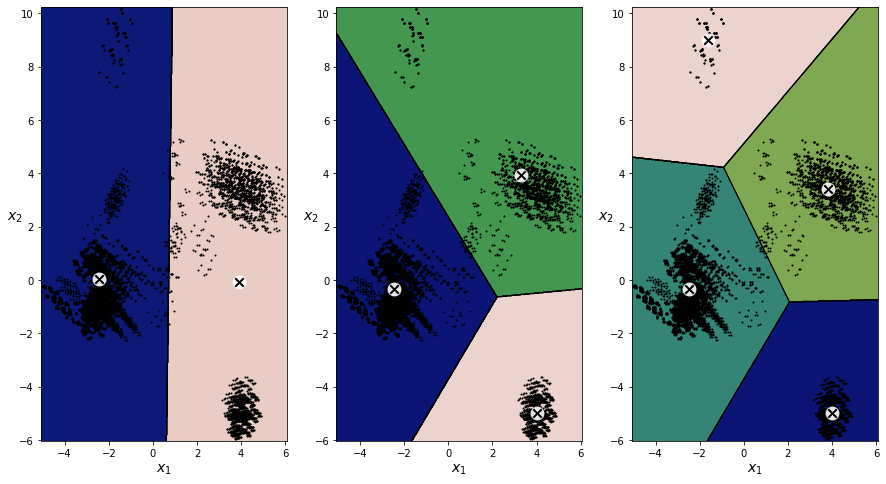

In [869]:
plt.figure(figsize=(15, 8))
plt.subplot(1,3,1)
plot_decision_boundaries(kmeans,pca_data)
plt.subplot(1,3,2)
plot_decision_boundaries(kmeans3,pca_data)
plt.subplot(1,3,3)
plot_decision_boundaries(kmeans4,pca_data)
plt.show()

# Elbow Method

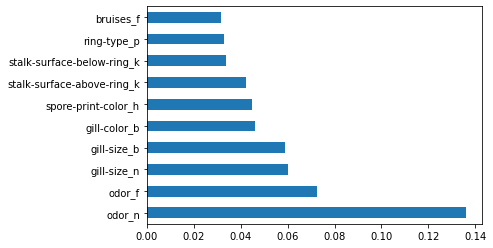

In [870]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(mushroom_scaled,mushroom_class)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=mushroom_col.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [871]:
top_feat=mushroom_col['odor_n'].to_frame()
topfeatures=['odor_f','gill-size_b','gill-size_n','spore-print-color_h','ring-type_p','stalk-surface-above-ring_k','stalk-surface-above-ring_s','stalk-surface-below-ring_k','gill-color_b']
for i in topfeatures:
    temp=mushroom_col[i]
    top_feat=top_feat.join(temp)
top_feat

,odor_n,odor_f,gill-size_b,gill-size_n,spore-print-color_h,ring-type_p,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,gill-color_b
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8120,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8121,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [872]:
Std_Scaler_full = StandardScaler()
topfeat_scaled = Std_Scaler.fit_transform(top_feat.to_numpy())

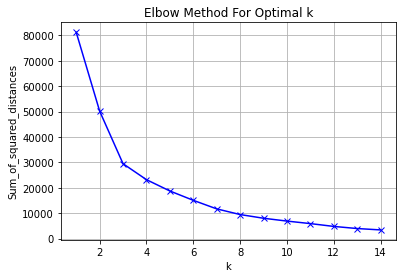

In [874]:
from matplotlib import pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(topfeat_scaled)
    Sum_of_squared_distances.append(km.inertia_)
#Visualing the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.grid()
plt.title('Elbow Method For Optimal k')
plt.show()

In [898]:
import plotly.express as px
km = KMeans(n_clusters=2, init="k-means++",n_init=10,random_state=42)
#km.fit(topfeat_scaled)

label_pred_full=km.fit_predict(topfeat_scaled)
rand_score_full=adjusted_rand_score(mushroom_class, label_pred_full)
rand_score_full

0.6353698410917504

# Gaussian Mixtures


In [876]:
from sklearn.mixture import GaussianMixture

# With PCA

In [877]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gm.fit(pca_data)

GaussianMixture(n_components=2, n_init=10, random_state=42)

In [878]:
gm.weights_

array([0.62314329, 0.37685671])

In [879]:
gm.means_

array([[-2.39921005,  0.07471918],
       [ 3.96716204, -0.12355029]])

In [880]:
gm.covariances_

array([[[ 1.00508648,  0.60380152],
        [ 0.60380152,  4.43664776]],

       [[ 0.44901058, -0.21183588],
        [-0.21183588, 17.65034881]]])

In [881]:
gm.converged_

True

In [882]:
gm.n_iter_

5

In [883]:
probs = gm.predict_proba(pca_data)
print(probs[:5])

[[1.00000000e+00 2.67752326e-26]
 [1.00000000e+00 2.89167075e-31]
 [1.00000000e+00 2.40192468e-38]
 [1.00000000e+00 1.16664940e-27]
 [1.00000000e+00 9.80411737e-23]]


In [884]:
labels_gm=gm.predict(pca_data)

In [885]:
gm_rand_score=adjusted_rand_score(mushroom_class, labels_gm)

In [886]:
gm_rand_score

0.6217025406270942

In [887]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9934620511018031

In [888]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

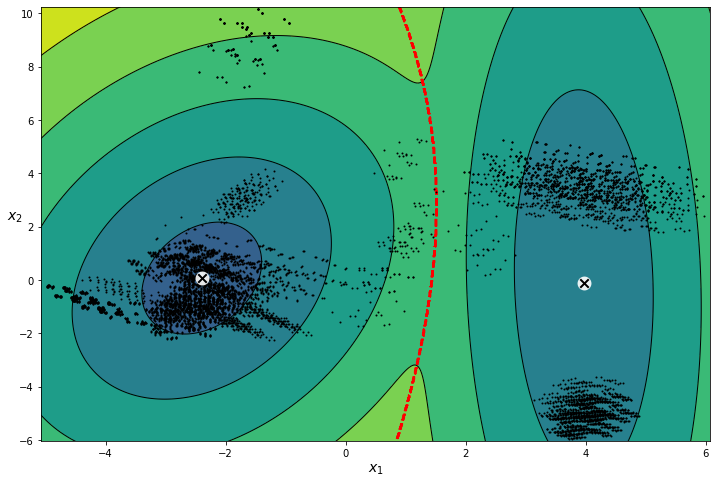

In [889]:
plt.figure(figsize=(12, 8))
plot_gaussian_mixture(gm, pca_data)
plt.show()

# Normal data

In [890]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
label_gmpred_full=gm.fit_predict(topfeat_scaled)
#=gm.predict(top_feat.to_numpy())
rand_score_full=adjusted_rand_score(mushroom_class, label_gmpred_full)
rand_score_full

0.6089520723199134